In [5]:
import sys
sys.path.append(r'C:\Users\tomer\Desktop\Fingers-Gesture-Recognition')

import Source.models as models
import torch

from Source.pipelines import Data_Pipeline
from Source.data_manager import Data_Manager
from warnings import simplefilter
from pathlib import Path
from importlib import reload

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# pipeline definition and data manager creation
data_path = Path(r'I:\My Drive\finger gesture recognition')
pipeline = Data_Pipeline(base_data_files_path=data_path)  # configure the data pipeline you would like to use (check pipelines module for more info)
dm = Data_Manager([18], pipeline)
print(dm.data_info())

Available experiments in the data manager: ['018_1_4', '018_1_2', '018_2_4', '018_1_1', '018_1_3']
Experiments format is: subject_session_position
None


In [8]:
# extract datasets from the data manager
dataset_train = dm.get_dataset(experiments='018_*_4')

data_train = dataset_train[0]
labels_train = dataset_train[1]  # labels are in the following format: "<subject>_<session>_<position>_<gesture>_<iteration_number>"

# reshape the data to match the model architecture
data_train = data_train.reshape(data_train.shape[0], 1, 4, 4)  # reshape to fit the CNN input

Experiments in datasets: ['018_1_4', '018_2_4']
Starting to extract datasets


Loading experiments datasets:   0%|          | 0/2 [00:00<?, ?exp/s]

finished extracting the dataset


In [9]:
# set and train a model (cv or not)
model = models.Net(num_classes=10, dropout_rate=0.3)
# model = torch.compile(model)  # optimize for faster training (doesn't seems to help)
model.fit_model(data_train, labels_train, num_epochs=200, batch_size=64, lr=0.001, l2_weight=0.0001)

number of gestures with only one repetition: 0
Their names are: []


training model: 100%|██████████| 200/200 [03:22<00:00,  1.01s/epoch]

Done Training!


0.875

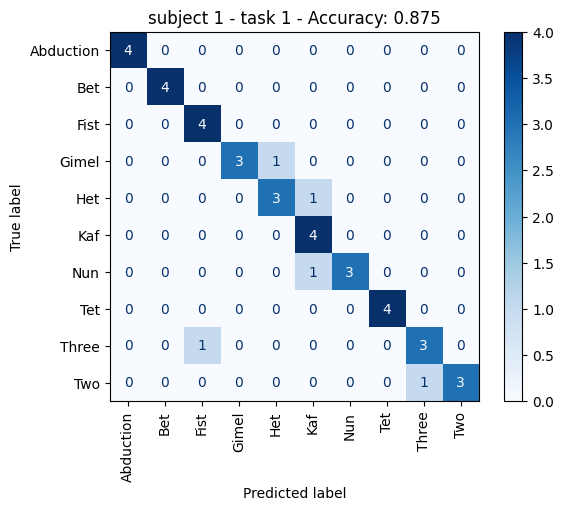

In [10]:
model.evaluate_model(model.test_data, model.test_labels, cm_title='subject 1 - task 1')